This notebook is an exercise of generative learning in creating Portuguese poems. Data was acquired from kaggle.com.

In [84]:
import tensorflow as tf

import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas as pd

import unicodedata
import re

import zipfile as zf

Let us unzip and read the dataset

In [2]:
files = zf.ZipFile("PortPoetry.zip", 'r')
files.extractall('PortuguesePoetry')
files.close()

Let us just see how the file looks like

In [3]:
file = open("PortuguesePoetry/portuguese-poems.csv", "r")
for line in range(100):
    print(file.readline())

Author,Title,Content,Views

CecÃ­lia Meireles,Retrato,"Eu nÃ£o tinha este rosto de hoje,

Assim calmo, assim triste, assim magro,

Nem estes olhos tÃ£o vazios,

Nem o lÃ¡bio amargo.



Eu nÃ£o tinha estas mÃ£os sem forÃ§a,

TÃ£o paradas e frias e mortas;

Eu nÃ£o tinha este coraÃ§Ã£o

Que nem se mostra.



Eu nÃ£o dei por esta mudanÃ§a,

TÃ£o simples, tÃ£o certa, tÃ£o fÃ¡cil:

- Em que espelho ficou perdida

A minha face?",1018431

Fernando Pessoa,"Para ser grande, sÃª inteiro: nada","Para ser grande, sÃª inteiro: nada

Teu exagera ou exclui.

SÃª todo em cada coisa. PÃµe quanto Ã©s

No mÃ­nimo que fazes.

Assim em cada lago a lua toda

Brilha, porque alta vive.",1979413

Marina Colasanti,"Eu sei, mas nÃ£o devia","Eu sei que a gente se acostuma. Mas nÃ£o devia.

A gente se acostuma a morar em apartamento de fundos 

e a nÃ£o ter outra vista que nÃ£o seja as janelas ao redor. 



E porque nÃ£o tem vista, logo se acostuma a nÃ£o olhar para fora.

E porque nÃ£o olha para fora logo se acos

Opening the file as .txt takes out the connection between author and text. So, let us open as a dataset

In [4]:
raw_data = pd.read_csv("PortuguesePoetry/portuguese-poems.csv")
raw_data

,Author,Title,Content,Views
0,Cecília Meireles,Retrato,"Eu não tinha este rosto de hoje,\r\nAssim calm...",1018431
1,Fernando Pessoa,"Para ser grande, sê inteiro: nada","Para ser grande, sê inteiro: nada\r\nTeu exage...",1979413
2,Marina Colasanti,"Eu sei, mas não devia",Eu sei que a gente se acostuma. Mas não devia....,301509
3,Carlos Drummond de Andrade,Quadrilha,João amava Teresa que amava Raimundo\r\nque am...,1421206
4,Eugénio de Andrade,É urgente o amor,É urgente o amor.\r\nÉ urgente um barco no mar...,621197
...,...,...,...,...
15538,Hashem Shaabani,Sete razões pelas quais eu deveria morrer,Por sete dias eles gritaram comigo:\nVocê trav...,53
15539,Helmut Heissenbüttel,Manchas de tinta fogem céleres,manchas de tinta fogem céleres sobre o conceit...,169
15540,Leónidas Lamborghini,Falando sozinho,Como aquele que vai falandosozinhopela ruatrat...,260
15541,Fernando Namora,Por Todos os Caminhos do Mundo,A minha poesia é assim como uma vida que vague...,24353


Much better. Let us see the data closely

In [5]:
poems = raw_data["Content"]
poems[0]

'Eu não tinha este rosto de hoje,\r\nAssim calmo, assim triste, assim magro,\r\nNem estes olhos tão vazios,\r\nNem o lábio amargo.\n\r\nEu não tinha estas mãos sem força,\r\nTão paradas e frias e mortas;\r\nEu não tinha este coração\r\nQue nem se mostra.\n\r\nEu não dei por esta mudança,\r\nTão simples, tão certa, tão fácil:\r\n- Em que espelho ficou perdida\r\nA minha face?'

Great, already unicoded!  Let us give a look at the data

In [6]:
authors =  raw_data["Author"]

print("Authors occurancy in percentage\n\n",str((authors.value_counts()/len(authors))*100))

Authors occurancy in percentage

 Fernando Pessoa                     14.360162
Sophia de Mello Breyner Andresen     2.843724
Jorge Luis Borges                    2.682880
Florbela Espanca                     2.232516
Angela Santos                        1.653477
                                      ...    
Silvia Brito                         0.006434
Shinkichi Takahashi                  0.006434
Cristiane Ferrari                    0.006434
Carla M                              0.006434
Lhasa de Sela                        0.006434
Name: Author, Length: 2127, dtype: float64


I do not really care about views, so I will simply delete that column

In [7]:
data = raw_data.drop("Views", axis=1)
data

,Author,Title,Content
0,Cecília Meireles,Retrato,"Eu não tinha este rosto de hoje,\r\nAssim calm..."
1,Fernando Pessoa,"Para ser grande, sê inteiro: nada","Para ser grande, sê inteiro: nada\r\nTeu exage..."
2,Marina Colasanti,"Eu sei, mas não devia",Eu sei que a gente se acostuma. Mas não devia....
3,Carlos Drummond de Andrade,Quadrilha,João amava Teresa que amava Raimundo\r\nque am...
4,Eugénio de Andrade,É urgente o amor,É urgente o amor.\r\nÉ urgente um barco no mar...
...,...,...,...
15538,Hashem Shaabani,Sete razões pelas quais eu deveria morrer,Por sete dias eles gritaram comigo:\nVocê trav...
15539,Helmut Heissenbüttel,Manchas de tinta fogem céleres,manchas de tinta fogem céleres sobre o conceit...
15540,Leónidas Lamborghini,Falando sozinho,Como aquele que vai falandosozinhopela ruatrat...
15541,Fernando Namora,Por Todos os Caminhos do Mundo,A minha poesia é assim como uma vida que vague...


I will add the title to the poem directly

In [8]:
data["Title+Content"] = data["Title"] + " \r\n\r\n\r\n " + data["Content"]
data

,Author,Title,Content,Title+Content
0,Cecília Meireles,Retrato,"Eu não tinha este rosto de hoje,\r\nAssim calm...",Retrato \r\n\r\n\r\n Eu não tinha este rosto d...
1,Fernando Pessoa,"Para ser grande, sê inteiro: nada","Para ser grande, sê inteiro: nada\r\nTeu exage...","Para ser grande, sê inteiro: nada \r\n\r\n\r\n..."
2,Marina Colasanti,"Eu sei, mas não devia",Eu sei que a gente se acostuma. Mas não devia....,"Eu sei, mas não devia \r\n\r\n\r\n Eu sei que ..."
3,Carlos Drummond de Andrade,Quadrilha,João amava Teresa que amava Raimundo\r\nque am...,Quadrilha \r\n\r\n\r\n João amava Teresa que a...
4,Eugénio de Andrade,É urgente o amor,É urgente o amor.\r\nÉ urgente um barco no mar...,É urgente o amor \r\n\r\n\r\n É urgente o amor...
...,...,...,...,...
15538,Hashem Shaabani,Sete razões pelas quais eu deveria morrer,Por sete dias eles gritaram comigo:\nVocê trav...,Sete razões pelas quais eu deveria morrer \r\n...
15539,Helmut Heissenbüttel,Manchas de tinta fogem céleres,manchas de tinta fogem céleres sobre o conceit...,Manchas de tinta fogem céleres \r\n\r\n\r\n ma...
15540,Leónidas Lamborghini,Falando sozinho,Como aquele que vai falandosozinhopela ruatrat...,Falando sozinho \r\n\r\n\r\n Como aquele que v...
15541,Fernando Namora,Por Todos os Caminhos do Mundo,A minha poesia é assim como uma vida que vague...,Por Todos os Caminhos do Mundo \r\n\r\n\r\n A ...


In [9]:
data[data["Author"]=="Luís de Camões"] #favorite poet

,Author,Title,Content,Title+Content
40,Luís de Camões,"Mudam-se os tempos, mudam-se as vontades","Mudam-se os tempos, mudam-se as vontades,\r\nm...","Mudam-se os tempos, mudam-se as vontades \r\n\..."
64,Luís de Camões,Amor é fogo que arde sem se ver,"Amor é fogo que arde sem se ver,\r\né ferida q...",Amor é fogo que arde sem se ver \r\n\r\n\r\n A...
99,Luís de Camões,Da alma e de quanto tiver,Da alma e de quanto tiver\r\nQuero que me desp...,Da alma e de quanto tiver \r\n\r\n\r\n Da alma...
125,Luís de Camões,Transforma-se o amador na cousa amada,"Transforma-se o amador na cousa amada,\r\nPor ...",Transforma-se o amador na cousa amada \r\n\r\n...
133,Luís de Camões,"Mas, conquanto não pode haver desgosto","Mas, conquanto não pode haver desgosto\r\nOnde...","Mas, conquanto não pode haver desgosto \r\n\r\..."
...,...,...,...,...
1994,Luís de Camões,"Amor, que o gesto humano na alma escreve","Amor, que o gesto humano na alma escreve,\r\nV...","Amor, que o gesto humano na alma escreve \r\n\..."
2024,Luís de Camões,Ah! minha Dinamene! Assim deixaste,Ah! minha Dinamene! Assim deixaste\r\nQuem não...,Ah! minha Dinamene! Assim deixaste \r\n\r\n\r\...
2181,Luís de Camões,"Um mover dolhos, brando e piadoso","Um mover dolhos, brando e piadoso,\r\nsem ver ...","Um mover dolhos, brando e piadoso \r\n\r\n\r\n..."
2244,Luís de Camões,Tomou-me vossa vista soberana,Tomou-me vossa vista soberana\r\nAonde tinha a...,Tomou-me vossa vista soberana \r\n\r\n\r\n Tom...


In [10]:
print(data["Title+Content"][64])

Amor é fogo que arde sem se ver 


 Amor é fogo que arde sem se ver,
é ferida que dói, e não se sente;
é um contentamento descontente,
é dor que desatina sem doer.

É um não querer mais que bem querer;
é um andar solitário entre a gente;
é nunca contentar-se de contente;
é um cuidar que ganha em se perder.

É querer estar preso por vontade;
é servir a quem vence, o vencedor;
é ter com quem nos mata, lealdade.

Mas como causar pode seu favor
nos corações humanos amizade,
se tão contrário a si é o mesmo Amor?


I will therefore delete the title and contents columns

In [11]:
data = data.drop("Title", axis=1)
data = data.drop("Content", axis=1)
data

,Author,Title+Content
0,Cecília Meireles,Retrato \r\n\r\n\r\n Eu não tinha este rosto d...
1,Fernando Pessoa,"Para ser grande, sê inteiro: nada \r\n\r\n\r\n..."
2,Marina Colasanti,"Eu sei, mas não devia \r\n\r\n\r\n Eu sei que ..."
3,Carlos Drummond de Andrade,Quadrilha \r\n\r\n\r\n João amava Teresa que a...
4,Eugénio de Andrade,É urgente o amor \r\n\r\n\r\n É urgente o amor...
...,...,...
15538,Hashem Shaabani,Sete razões pelas quais eu deveria morrer \r\n...
15539,Helmut Heissenbüttel,Manchas de tinta fogem céleres \r\n\r\n\r\n ma...
15540,Leónidas Lamborghini,Falando sozinho \r\n\r\n\r\n Como aquele que v...
15541,Fernando Namora,Por Todos os Caminhos do Mundo \r\n\r\n\r\n A ...


I will also delete "nan" rows of content

In [12]:
data = data.dropna(axis = 0)
data

,Author,Title+Content
0,Cecília Meireles,Retrato \r\n\r\n\r\n Eu não tinha este rosto d...
1,Fernando Pessoa,"Para ser grande, sê inteiro: nada \r\n\r\n\r\n..."
2,Marina Colasanti,"Eu sei, mas não devia \r\n\r\n\r\n Eu sei que ..."
3,Carlos Drummond de Andrade,Quadrilha \r\n\r\n\r\n João amava Teresa que a...
4,Eugénio de Andrade,É urgente o amor \r\n\r\n\r\n É urgente o amor...
...,...,...
15538,Hashem Shaabani,Sete razões pelas quais eu deveria morrer \r\n...
15539,Helmut Heissenbüttel,Manchas de tinta fogem céleres \r\n\r\n\r\n ma...
15540,Leónidas Lamborghini,Falando sozinho \r\n\r\n\r\n Como aquele que v...
15541,Fernando Namora,Por Todos os Caminhos do Mundo \r\n\r\n\r\n A ...


Let us numeralize the data

In [14]:
def string_tokenizer(string):
    return "<start> " + string.lower().strip() + " <end>"

In [15]:
string_tokenizer(data["Title+Content"][64])

'<start> amor é fogo que arde sem se ver \r\n\r\n\r\n amor é fogo que arde sem se ver,\r\né ferida que dói, e não se sente;\r\né um contentamento descontente,\r\né dor que desatina sem doer.\n\r\né um não querer mais que bem querer;\r\né um andar solitário entre a gente;\r\né nunca contentar-se de contente;\r\né um cuidar que ganha em se perder.\n\r\né querer estar preso por vontade;\r\né servir a quem vence, o vencedor;\r\né ter com quem nos mata, lealdade.\n\r\nmas como causar pode seu favor\r\nnos corações humanos amizade,\r\nse tão contrário a si é o mesmo amor? <end>'

I also need to add space between punctuation and string markers

In [16]:
def spacer(string):
    string = re.sub(r"([?.!,;])", r" \1 ", string) #give space between punctuation
    string = re.sub(r"([\n\r])", r" \1 ", string) #give space between tokens
    return string

In [17]:
spacer(data["Title+Content"][64])

'Amor é fogo que arde sem se ver  \r  \n  \r  \n  \r  \n  Amor é fogo que arde sem se ver ,  \r  \n é ferida que dói ,  e não se sente ;  \r  \n é um contentamento descontente ,  \r  \n é dor que desatina sem doer .  \n  \r  \n É um não querer mais que bem querer ;  \r  \n é um andar solitário entre a gente ;  \r  \n é nunca contentar-se de contente ;  \r  \n é um cuidar que ganha em se perder .  \n  \r  \n É querer estar preso por vontade ;  \r  \n é servir a quem vence ,  o vencedor ;  \r  \n é ter com quem nos mata ,  lealdade .  \n  \r  \n Mas como causar pode seu favor \r  \n nos corações humanos amizade ,  \r  \n se tão contrário a si é o mesmo Amor ? '

Finally, we make a general function for this

In [18]:
def string_preprocess(string):
    string = string_tokenizer(string)
    string = spacer(string)
    return string

In [19]:
string_preprocess(data["Title+Content"][64])

'<start> amor é fogo que arde sem se ver  \r  \n  \r  \n  \r  \n  amor é fogo que arde sem se ver ,  \r  \n é ferida que dói ,  e não se sente ;  \r  \n é um contentamento descontente ,  \r  \n é dor que desatina sem doer .  \n  \r  \n é um não querer mais que bem querer ;  \r  \n é um andar solitário entre a gente ;  \r  \n é nunca contentar-se de contente ;  \r  \n é um cuidar que ganha em se perder .  \n  \r  \n é querer estar preso por vontade ;  \r  \n é servir a quem vence ,  o vencedor ;  \r  \n é ter com quem nos mata ,  lealdade .  \n  \r  \n mas como causar pode seu favor \r  \n nos corações humanos amizade ,  \r  \n se tão contrário a si é o mesmo amor ?  <end>'

Now appylying this to the whole data set

In [20]:
author = data_np[:,0]
poem = data_np[:,1]

In [34]:
poem_preprocessed = [string_preprocess(text).split() for text in list(poem)] #also splits the srings, not as arrays

In [35]:
poem_preprocessed[0]

['<start>',
 'retrato',
 'eu',
 'não',
 'tinha',
 'este',
 'rosto',
 'de',
 'hoje',
 ',',
 'assim',
 'calmo',
 ',',
 'assim',
 'triste',
 ',',
 'assim',
 'magro',
 ',',
 'nem',
 'estes',
 'olhos',
 'tão',
 'vazios',
 ',',
 'nem',
 'o',
 'lábio',
 'amargo',
 '.',
 'eu',
 'não',
 'tinha',
 'estas',
 'mãos',
 'sem',
 'força',
 ',',
 'tão',
 'paradas',
 'e',
 'frias',
 'e',
 'mortas',
 ';',
 'eu',
 'não',
 'tinha',
 'este',
 'coração',
 'que',
 'nem',
 'se',
 'mostra',
 '.',
 'eu',
 'não',
 'dei',
 'por',
 'esta',
 'mudança',
 ',',
 'tão',
 'simples',
 ',',
 'tão',
 'certa',
 ',',
 'tão',
 'fácil:',
 '-',
 'em',
 'que',
 'espelho',
 'ficou',
 'perdida',
 'a',
 'minha',
 'face',
 '?',
 '<end>']

Let us check now how are sequence the sequences lenghts

In [67]:
len_poems = [len(text) for text in poem_preprocessed]

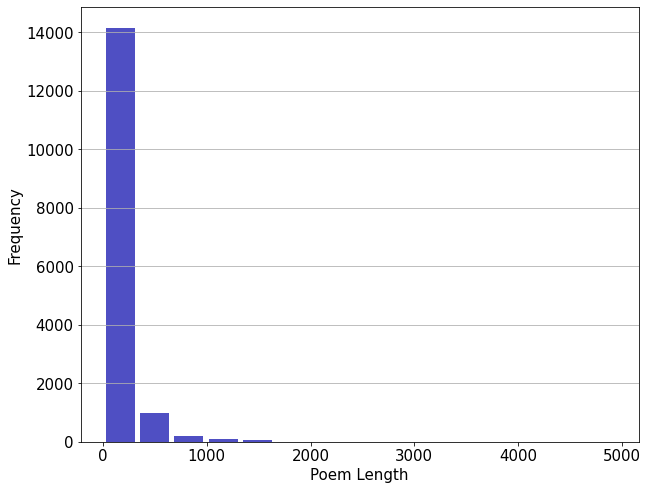

In [74]:
plt.figure(figsize=[10,8])
n, bins, patches = plt.hist(x=len_poems, bins=15, color='#0504aa',alpha=0.7, rwidth=0.85)
plt.grid(axis='y')
plt.xlabel('Poem Length',fontsize=15)
plt.ylabel('Frequency',fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel('Frequency',fontsize=15)
plt.show()

A fairly decreasing distribution. Let us see it more numerically

In [99]:
def stats(data, cap):
    """
    Gives the data average and the percentile before a cap
    """
    avg = sum(data)/len(data)
    percentile_data = [data[element] for element in data if data[element]<cap]
    percentile = len(percentile_data)/len(data)*100
    return avg, percentile

Let us see the percentiles

In [106]:
for cap in [100,200,300,500,700,1000]:
    print(cap,"---->",stats(len_poems, cap)[1],"%")

100 ----> 53.053214078888104 %
200 ----> 81.62280419535422 %
300 ----> 89.61456791712244 %
500 ----> 96.3387169422817 %
700 ----> 97.56772408467923 %
1000 ----> 98.97046522102825 %


Looking at only 300 length poems seems reasonable. I will then take these poems only

In [110]:
max_poem = 300

In [120]:
data_np = np.array([data_np[element] for element in range(len(data_np)) if len_poems[element] <= max_poem])
data_np.shape

(9638, 2)

In [125]:
author = data_np[:,0]
poem = data_np[:,1]

In [126]:
poem_preprocessed = [string_preprocess(text).split() for text in list(poem)]
poem_preprocessed[0]

['<start>',
 'retrato',
 'eu',
 'não',
 'tinha',
 'este',
 'rosto',
 'de',
 'hoje',
 ',',
 'assim',
 'calmo',
 ',',
 'assim',
 'triste',
 ',',
 'assim',
 'magro',
 ',',
 'nem',
 'estes',
 'olhos',
 'tão',
 'vazios',
 ',',
 'nem',
 'o',
 'lábio',
 'amargo',
 '.',
 'eu',
 'não',
 'tinha',
 'estas',
 'mãos',
 'sem',
 'força',
 ',',
 'tão',
 'paradas',
 'e',
 'frias',
 'e',
 'mortas',
 ';',
 'eu',
 'não',
 'tinha',
 'este',
 'coração',
 'que',
 'nem',
 'se',
 'mostra',
 '.',
 'eu',
 'não',
 'dei',
 'por',
 'esta',
 'mudança',
 ',',
 'tão',
 'simples',
 ',',
 'tão',
 'certa',
 ',',
 'tão',
 'fácil:',
 '-',
 'em',
 'que',
 'espelho',
 'ficou',
 'perdida',
 'a',
 'minha',
 'face',
 '?',
 '<end>']

Now, let us build the vocabulary

In [128]:
from collections import Counter 
vocab = Counter() #make counter
for poem in poem_preprocessed:
    vocab.update(list(poem))

So the vocabulary size is

In [129]:
len(vocab)

83291

In [131]:
vocab.most_common()[0:100]

[(',', 69231),
 ('.', 66104),
 ('de', 30571),
 ('a', 29501),
 ('que', 27670),
 ('e', 27384),
 ('o', 26474),
 ('do', 10850),
 ('não', 10465),
 ('<start>', 9638),
 ('<end>', 9638),
 ('um', 8787),
 ('da', 8780),
 ('é', 8698),
 ('em', 8414),
 ('se', 8330),
 ('no', 7618),
 ('!', 7312),
 ('os', 7036),
 ('as', 6298),
 ('me', 5761),
 ('na', 5486),
 ('como', 5054),
 ('eu', 4940),
 ('com', 4529),
 ('uma', 4515),
 ('?', 4426),
 ('para', 4267),
 ('por', 4194),
 ('meu', 4154),
 ('mais', 3852),
 ('ao', 3783),
 ('dos', 3588),
 (';', 3374),
 ('sem', 3161),
 ('mas', 2871),
 ('das', 2802),
 ('vida', 2784),
 ('à', 2725),
 ('minha', 2677),
 ('nos', 2671),
 ('amor', 2577),
 ('te', 2557),
 ('teu', 2311),
 ('só', 2275),
 ('quem', 2180),
 ('quando', 2161),
 ('ser', 2160),
 ('ou', 2130),
 ('the', 2079),
 ('tudo', 2035),
 ('nem', 1961),
 ('onde', 1937),
 ('noite', 1913),
 ('la', 1907),
 ('são', 1881),
 ('mim', 1873),
 ('—', 1820),
 ('seu', 1810),
 ('há', 1791),
 ('olhos', 1741),
 ('-', 1710),
 ('el', 1667),
 ('

Seems I will use only part of the vocabulary. I will use only 15000 words

In [132]:
vocab_size = 15000 
truncated_vocab = [word for word, count in vocabulary.most_common()[: vocab_size]] #word,count represents the fact that the entries in most_common are duplets
truncated_vocab[0:20]

[',',
 '.',
 'de',
 'a',
 'e',
 'que',
 'o',
 'do',
 'não',
 'da',
 'um',
 '!',
 'em',
 'é',
 'se',
 'no',
 'os',
 '<start>',
 '<end>',
 'as']

And we will make a translator to numeralize

In [152]:
translator = {truncated_vocab[number]:number+1 for number in range(0,len(truncated_vocab))} #I add +1 to the keys because I want to use 0 for padding

In [153]:
[translator[word] for word in ["eu", "como","amor","deus"]]

[24, 22, 43, 97]

Great! Let us apply the dictionary to the data, padding when necessary!

In [159]:
poem_final = []
for text in poem_preprocessed:
    translation = []
    for word in text:
        if word not in translator:#if out of dictionary word
            translation.append(len(translator)+2) 
        else: #else add the translation
            translation.append(translator[word])
    
    if len(translation) != max_poem: #do the padding
        padding = [0 for number in range(max_poem-len(text))]
        translation += padding
    poem_final.append(translation)

poem_final = np.array(poem_final)

In [163]:
poem_final[0]

array([   18,  1153,    24,     9,   293,   131,   223,     3,   159,
           1,    93,  2075,     1,    93,   192,     1,    93,  4217,
           1,    57,   738,    63,    68,  2793,     1,    57,     7,
        1746,  1626,     2,    24,     9,   293,   632,   132,    36,
         383,     1,    68,  5649,     5,  1775,     5,  1358,    33,
          24,     9,   293,   131,    90,     6,    57,    15,  1530,
           2,    24,     9,  1376,    28,   123,  2975,     1,    68,
         550,     1,    68,   862,     1,    68, 15002,    58,    13,
           6,   577,   573,   693,     4,    41,   351,    25,    19,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,

And split the data

In [164]:
author_train, author_pre_val, poem_train, poem_pre_val = train_test_split(author, poem_final, test_size = 0.2, random_state = 42)

In [165]:
author_train.shape, author_pre_val.shape, poem_train.shape, poem_pre_val.shape

((7710,), (1928,), (7710, 300), (1928, 300))

And now split the remaining into test and validation

In [166]:
author_val, auhtor_test, poem_val, poem_test = train_test_split(author_pre_val, poem_pre_val, test_size = 0.5, random_state = 42)

In [167]:
author_val.shape, auhtor_test.shape, poem_val.shape, poem_test.shape

((964,), (964,), (964, 300), (964, 300))

Great! Time to train! First, I will sequentialize the data